## Data Analysis

1. Import Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import datetime

data_df1 = pd.read_csv("ddf1_final.csv")
act_df1 = pd.read_csv("adf1_final.csv")

data_df2 = pd.read_csv("ddf2_final.csv")
act_df2 = pd.read_csv("adf2_final.csv")

def timetoindex(df1):
    df1['Timestamp'] = df1['Timestamp'].astype('str') 
    df1.index = pd.to_datetime(df1["Timestamp"])
    df1 = df1.drop(columns=["Timestamp"])
    return df1

data_df1 = timetoindex(data_df1)
data_df2 = timetoindex(data_df2)

act_df1 = timetoindex(act_df1)
act_df2 = timetoindex(act_df2)

act_df1["duration"] = pd.to_timedelta(act_df1["duration"])
act_df2["duration"] = pd.to_timedelta(act_df2["duration"])

act_df1["end_time"] = pd.to_datetime(act_df1["end_time"])
act_df2["end_time"] = pd.to_datetime(act_df2["end_time"])
        

#print(data_df2)
#print(act_df2)

In [2]:
import plotly.express as px
import matplotlib.pyplot as plt

def plotActivity(data):    
    fig = px.timeline(data, x_start=data.index, x_end="end_time", y="Activity")
    fig.update_yaxes(autorange="reversed")
    fig.show()

def plotData(df):
    plt.figure(figsize=(15,5))

    plt.plot(df.index, df["FR"], label = "FR")
    plt.plot(df.index, df["BR"], label = "BR")
    plt.plot(df.index, df["B"], label = "B")
    plt.plot(df.index, df["BL"], label = "BL")
    plt.plot(df.index, df["FL"], label = "FL")

    plt.xlabel('Time')
    plt.legend()
    plt.title('Title')
    plt.show()

In [3]:
def plotBoth(df,act):
    acts = []
    times = []
    for x in range(len(act)):
        if act["Activity"][x] == "Work":
            task = 2
        elif act["Activity"][x] == "Meditation":
            task = 1
        else:
            task =0
        acts.append(task)
        times.append(act.index[x])
        acts.append(task)
        times.append(act["end_time"][x])
    
    act = pd.DataFrame(list(zip(times, acts)), columns = ["Timestamp","Activity"])

    # make timestamp the index
    act['Timestamp'] = act['Timestamp'].astype('str') 
    act.index = pd.to_datetime(act["Timestamp"])
    act = act.drop(columns=["Timestamp"])
    
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    
    ax1.plot(df.index, df["FR"], label = "FR")
    ax1.plot(df.index, df["BR"], label = "BR")
    ax1.plot(df.index, df["B"], label = "B")
    ax1.plot(df.index, df["BL"], label = "BL")
    ax1.plot(df.index, df["FL"], label = "FL")
    ax2.plot(act.index, act["Activity"], label = "Activity", c="#000000", linewidth=2.0)
    plt.yticks(range(3), ["Break","Meditation", "Work"])
    
    
    plt.xlabel('Time')
    plt.legend()
    plt.title('Title')
    plt.show()


In [24]:

#print(data_df2.loc[day])
#print(act_df2.loc[day])
#plotData(data_df2.loc[day][-10000:-5000])

In [5]:


def calculateValues(data,act,dates,day, control):
    work_len = []
    work_count = []
    max_work_len = []
    average_work_len = []
    min_work_len = []

    med_count = []

    break_len = []
    break_count = []
    min_break_len = []
    average_break_len = []
    max_break_len = []

    day_len = []
    
    work_only = act.loc[act['Activity'] == "Work"]
    for date in dates:
        temp = work_only.loc[date]
        work_len.append(temp['duration'].sum().round('1s'))
        work_count.append(len(temp))
        max_work_len.append(temp['duration'].max().round('1s'))
        average_work_len.append((temp['duration'].sum()/len(temp)).round('1s'))
        min_work_len.append(temp['duration'].min().round('1s'))
    
    med_only = act.loc[act['Activity'] == "Meditation"]
    for date in dates:
        try:
            temp = med_only.loc[date]
            med_count.append(len(temp))
        except:
            med_count.append(0)
        
    break_only = act.loc[act['Activity'] == "Break"]
    for date in dates:
        temp = break_only.loc[date]
        break_len.append(temp['duration'].sum().round('1s'))
        break_count.append(len(temp))
        max_break_len.append(temp['duration'].max().round('1s'))
        average_break_len.append((temp['duration'].sum()/len(temp)).round('1s'))
        min_break_len.append(temp['duration'].min().round('1s'))
        
    for date in dates:
        temp = data.loc[date]
        day_len.append((temp.index[-1]-temp.index[0]).round('1s'))
    
    
    #print (work_len)
    #print (work_count)
    #print (max_work_len)
    #print (average_work_len)
    #print (min_work_len)
    
    #print (med_count)
    
    #print (break_len)
    #print (break_count)
    #print (break_work_len)
    #print (average_break_len)
    #print (min_break_len)
    
    #print(day_len)

    headers = ["dates","day","control","work_len",'work_count', 'max_work_len', 'average_work_len', 'min_work_len', 'med_count', 'break_len', 'break_count', 'min_break_len', 'average_break_len', 'max_break_len', 'day_len']
    df = pd.DataFrame(list(zip(dates,day,control,work_len, work_count, max_work_len, average_work_len, min_work_len, med_count, break_len, break_count, min_break_len, average_break_len, max_break_len, day_len)), columns = headers)
    
    # make timestamp the index
    df['dates'] = df['dates'].astype('str') 
    df.index = pd.to_datetime(df["dates"])
    df = df.drop(columns=["dates"])
    
    return df


In [6]:
# Ratio of working hours Participant 1
day1 = ["Mon", "Tue", "Wed","Thu", "Fri","Tue", "Wed","Thu", "Fri", "Mon"]
control1 = [0,1,1,1,0,2,2,2,0,0] # 0:control 1:Intervention1 2:Intervention2
dates1 = ["2021-04-26","2021-04-27","2021-04-28","2021-04-29","2021-04-30",
         "2021-05-04","2021-05-05","2021-05-06","2021-05-07","2021-05-10"]


    
values1 = calculateValues(data_df1,act_df1,dates1, day1, control1)
print(values1)

print(values1.dtypes)

            day  control        work_len  work_count    max_work_len  \
dates                                                                  
2021-04-26  Mon        0 0 days 08:09:27          11 0 days 01:39:58   
2021-04-27  Tue        1 0 days 08:46:27          11 0 days 02:32:32   
2021-04-28  Wed        1 0 days 07:00:59          12 0 days 01:22:21   
2021-04-29  Thu        1 0 days 06:57:35          10 0 days 01:48:26   
2021-04-30  Fri        0 0 days 07:35:46          11 0 days 01:15:40   
2021-05-04  Tue        2 0 days 06:31:57           8 0 days 02:27:43   
2021-05-05  Wed        2 0 days 05:02:09           8 0 days 01:24:40   
2021-05-06  Thu        2 0 days 07:36:33           6 0 days 02:47:18   
2021-05-07  Fri        0 0 days 06:19:14           7 0 days 01:27:55   
2021-05-10  Mon        0 0 days 07:17:58           8 0 days 01:53:27   

           average_work_len    min_work_len  med_count       break_len  \
dates                                                        

In [7]:
# Ratio of working hours Participant 2
day2 = ["Mon", "Tue", "Wed","Thu", "Fri","Mon","Tue", "Wed","Thu", "Fri"]
control2 = [0,1,1,1,0,0,2,2,2,0] # 0:control 1:Intervention1 2:Intervention2
dates2 = ["2021-04-26","2021-04-27","2021-04-28","2021-04-29","2021-04-30",
         "2021-05-10","2021-05-11","2021-05-12","2021-05-13","2021-05-14"]

values2 = calculateValues(data_df2,act_df2,dates2, day2, control2)
print(values2)

            day  control        work_len  work_count    max_work_len  \
dates                                                                  
2021-04-26  Mon        0 0 days 05:16:59          11 0 days 01:14:50   
2021-04-27  Tue        1 0 days 07:33:56          14 0 days 01:25:20   
2021-04-28  Wed        1 0 days 07:36:54          13 0 days 01:24:17   
2021-04-29  Thu        1 0 days 09:13:34          12 0 days 02:19:56   
2021-04-30  Fri        0 0 days 08:05:52           6 0 days 02:26:24   
2021-05-10  Mon        0 0 days 07:11:27          15 0 days 01:37:07   
2021-05-11  Tue        2 0 days 06:42:45          12 0 days 02:28:08   
2021-05-12  Wed        2 0 days 05:39:22          11 0 days 01:56:22   
2021-05-13  Thu        2 0 days 07:31:01          20 0 days 01:19:10   
2021-05-14  Fri        0 0 days 03:08:58          10 0 days 02:02:07   

           average_work_len    min_work_len  med_count       break_len  \
dates                                                        

In [8]:
def leaningback(df,act):    
    df = df[ df.iloc[:,2]>= 12000]    ##12000
    distracted = datetime.timedelta(seconds=len(df))
    #print (distracted)
    '''
    acts = []
    times = []
    for x in range(len(act)):
        if act["Activity"][x] == "Work":
            task = 2
        elif act["Activity"][x] == "Meditation":
            task = 1
        else:
            task =0
        acts.append(task)
        times.append(act.index[x])
        acts.append(task)
        times.append(act["end_time"][x])
    
    act = pd.DataFrame(list(zip(times, acts)), columns = ["Timestamp","Activity"])

    # make timestamp the index
    act['Timestamp'] = act['Timestamp'].astype('str') 
    act.index = pd.to_datetime(act["Timestamp"])
    act = act.drop(columns=["Timestamp"])
    
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    
    ax1.plot(df.index, df["B"], label = "B")
    ax2.plot(act.index, act["Activity"], label = "Activity", c="#000000", linewidth=2.0)
    plt.yticks(range(3), ["Break","Meditation", "Work"])
    
    
    plt.xlabel('Time')
    plt.legend()
    plt.title('Title')
    plt.show()
    '''
    return distracted
 
distracted = []
for day in dates1:
    distracted.append(leaningback(data_df1.loc[day],act_df1.loc[day]))
    
values1["leaning back"] = distracted 
values1["leaning back p"] =  round(100*values1["leaning back"]/values1["work_len"],2)
print(values1["leaning back p"])

distracted = []
for day in dates2:
    distracted.append(leaningback(data_df2.loc[day],act_df2.loc[day]))
    
values2["leaning back"] = distracted 
values2["leaning back p"] =  round(100*values2["leaning back"]/values2["work_len"],2)
print(values2["leaning back p"])


dates
2021-04-26     1.43
2021-04-27    19.94
2021-04-28     7.79
2021-04-29     4.37
2021-04-30     6.81
2021-05-04    11.62
2021-05-05    23.39
2021-05-06     4.03
2021-05-07     1.79
2021-05-10     1.80
Name: leaning back p, dtype: float64
dates
2021-04-26    18.26
2021-04-27     6.10
2021-04-28    20.28
2021-04-29    10.27
2021-04-30    48.54
2021-05-10    21.25
2021-05-11    30.16
2021-05-12     0.00
2021-05-13     0.00
2021-05-14     0.00
Name: leaning back p, dtype: float64


In [9]:
## leaning forward

def leaningforward(df,act):    
    df = df[ ((df.iloc[:,0]> 1000) | (df.iloc[:,4]> 1000) )   & (((df.iloc[:,0]> df.iloc[:,1]) & (df.iloc[:,0]> df.iloc[:,3])) | ((df.iloc[:,4]> df.iloc[:,1]) & (df.iloc[:,4]> df.iloc[:,3])))]
    focused = datetime.timedelta(seconds=len(df))
    #print (focused)
    '''
    acts = []
    times = []
    for x in range(len(act)):
        if act["Activity"][x] == "Work":
            task = 2
        elif act["Activity"][x] == "Meditation":
            task = 1
        else:
            task =0
        acts.append(task)
        times.append(act.index[x])
        acts.append(task)
        times.append(act["end_time"][x])
    
    act = pd.DataFrame(list(zip(times, acts)), columns = ["Timestamp","Activity"])

    # make timestamp the index
    act['Timestamp'] = act['Timestamp'].astype('str') 
    act.index = pd.to_datetime(act["Timestamp"])
    act = act.drop(columns=["Timestamp"])
    
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    
    ax1.plot(df.index, df["FR"], label = "FR")  # blue
    ax1.plot(df.index, df["BR"], label = "BR")  # orange
    ax1.plot(df.index, df["B"], label = "B")  # green
    ax1.plot(df.index, df["BL"], label = "BL")  # red
    ax1.plot(df.index, df["FL"], label = "FL")  # purple
    ax2.plot(act.index, act["Activity"], label = "Activity", c="#000000", linewidth=2.0)
    plt.yticks(range(3), ["Break","Meditation", "Work"])
    
    
    plt.xlabel('Time')
    plt.legend()
    plt.title('Title')
    plt.show()
    '''
    return focused
 
focused =[]
for day in dates1:
    focused.append(leaningforward(data_df1.loc[day],act_df1.loc[day]))
    
values1["leaning forward"] = focused
values1["leaning forward p"] =  round(100*values1["leaning forward"]/values1["work_len"],2)
print(values1["leaning forward p"])
    
for day in dates2:
    leaningforward(data_df2.loc[day],act_df2.loc[day])
    
focused =[]
for day in dates2:
    focused.append(leaningforward(data_df2.loc[day],act_df2.loc[day]))
    
values2["leaning forward"] = focused
values2["leaning forward p"] =  round(100*values2["leaning forward"]/values2["work_len"],2)
print(values2["leaning forward p"])




dates
2021-04-26    48.55
2021-04-27    52.76
2021-04-28    50.09
2021-04-29    41.98
2021-04-30    51.58
2021-05-04    54.06
2021-05-05    63.54
2021-05-06    50.71
2021-05-07    58.69
2021-05-10    54.33
Name: leaning forward p, dtype: float64
dates
2021-04-26    47.32
2021-04-27    54.34
2021-04-28    48.34
2021-04-29    67.68
2021-04-30    41.22
2021-05-10    69.82
2021-05-11    51.95
2021-05-12    62.76
2021-05-13    81.14
2021-05-14    44.52
Name: leaning forward p, dtype: float64


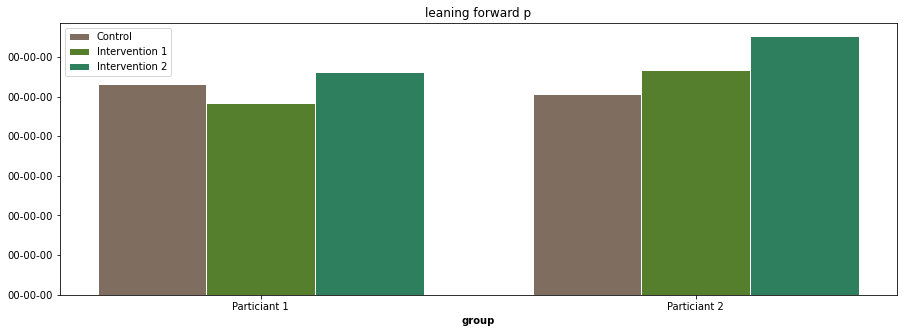

In [10]:


def plotBar(data1,data2,variable):
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)
    
    control1 = data1.loc[data1["control"]==0].mean()
    int11 = data1.loc[data1["control"]==1].mean()
    int21 = data1.loc[data1["control"]==2].mean()
    
    control2 = data2.loc[data2["control"]==0].mean()
    int12 = data2.loc[data2["control"]==1].mean()
    int22 = data2.loc[data2["control"]==2].mean()
    
    if isinstance(control1[variable],datetime.timedelta)==True:
        print("True")
        zero = datetime.datetime(1970,1,1,0,0,0)
        control = [control1[variable]+zero,control2[variable]+zero]
        int1 = [int11[variable]+zero,int12[variable]+zero]
        int2 = [int21[variable]+zero,int22[variable]+zero]
    else:
        control = [control1[variable],control2[variable]]
        int1 = [int11[variable],int12[variable]]
        int2 = [int21[variable],int22[variable]]
    
    barWidth = 0.25
    r1 = np.arange(len(control))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    
    # Make the plot
    plt.bar(r1, control, color='#7f6d5f', width=barWidth, edgecolor='white', label='Control')
    plt.bar(r2, int1, color='#557f2d', width=barWidth, edgecolor='white', label='Intervention 1')
    plt.bar(r3, int2, color='#2d7f5e', width=barWidth, edgecolor='white', label='Intervention 2')

    # Add xticks on the middle of the group bars
    plt.xlabel('group', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(control))], ['Particiant 1','Particiant 2'])
    ax.yaxis.set_major_formatter(mdates.DateFormatter('%H-%M-%S'))

    # Create legend & Show graphic
    plt.legend()
    plt.title(variable)
    # Save as PNG
    plt.savefig(variable+'.png', dpi=300)
    # show
    plt.show()
    
    

    
plotBar(values1,values2,"leaning forward p")

True


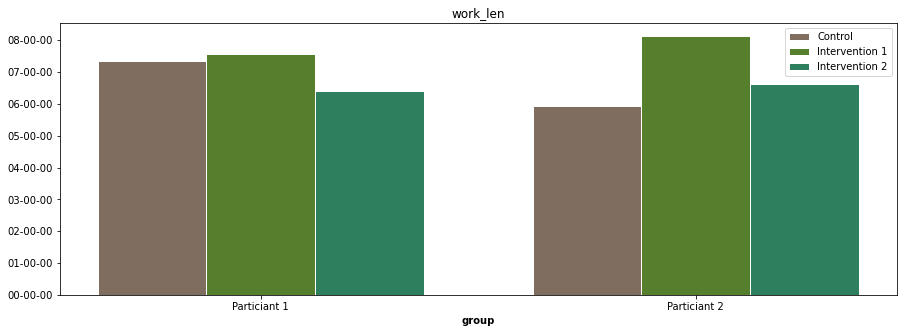

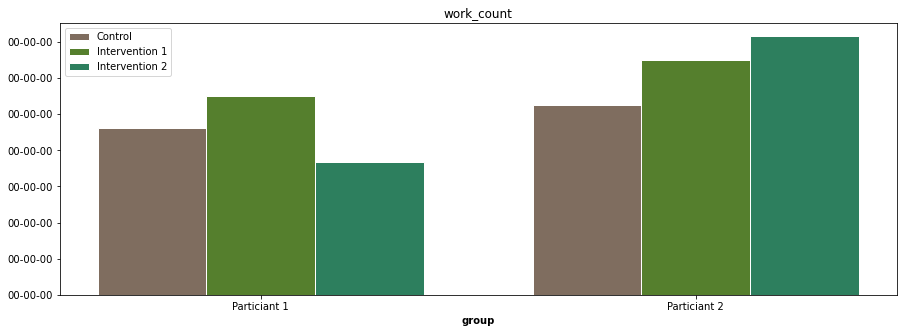

True


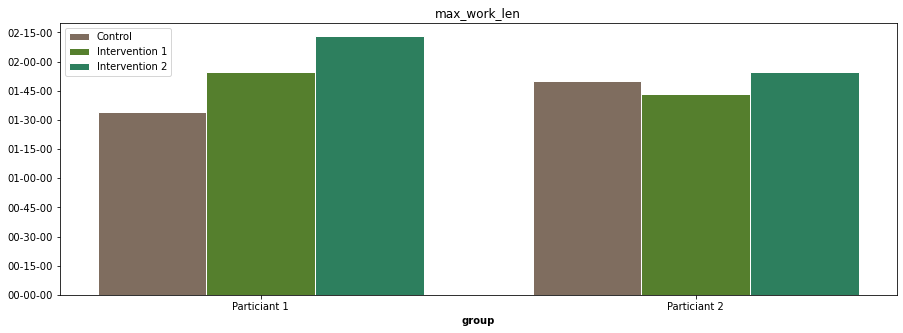

True


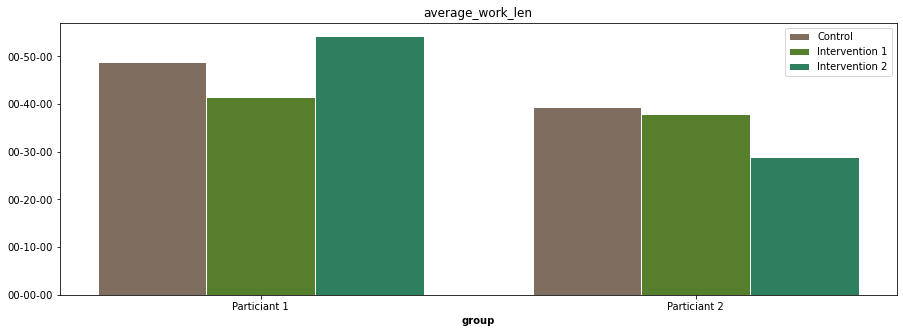

True


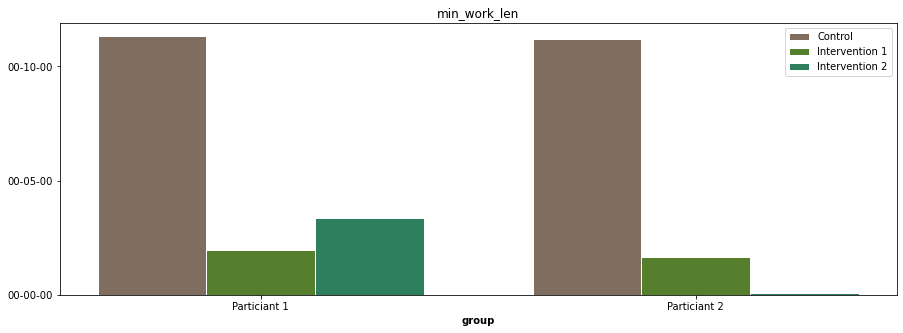

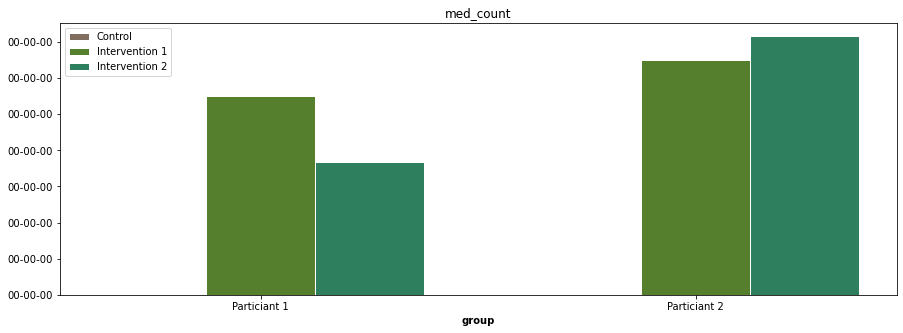

True


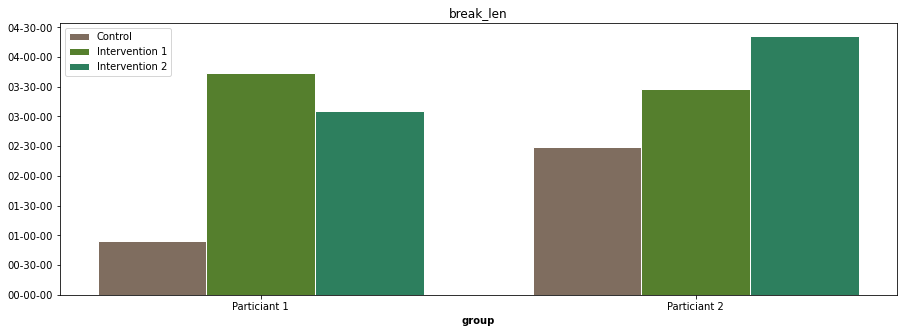

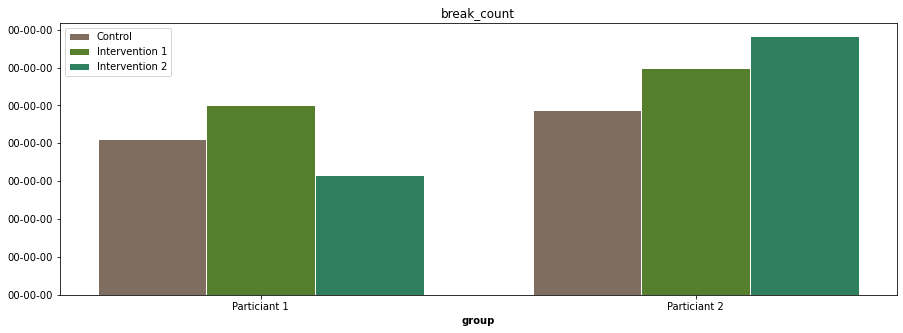

True


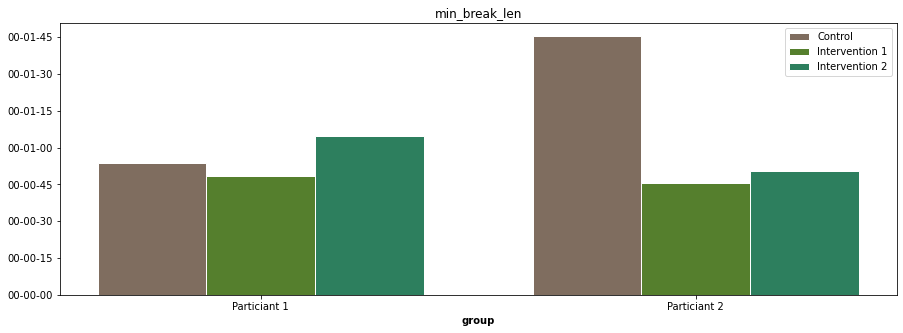

True


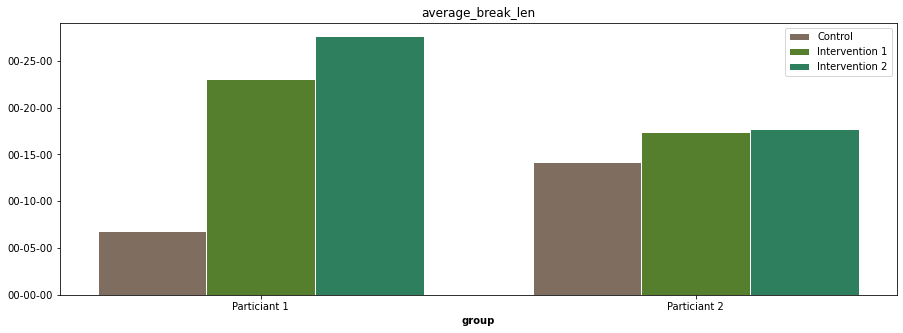

True


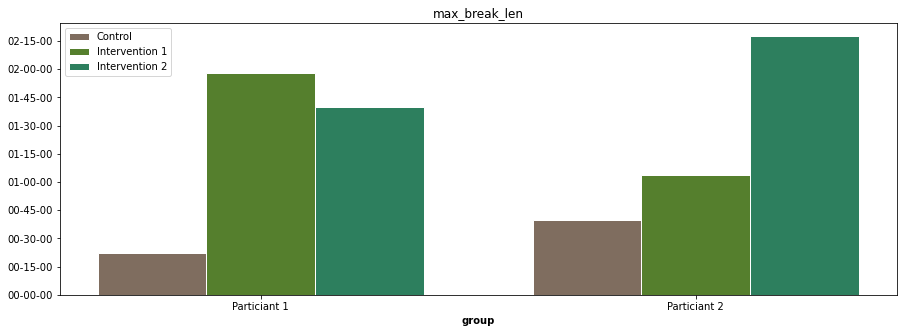

True


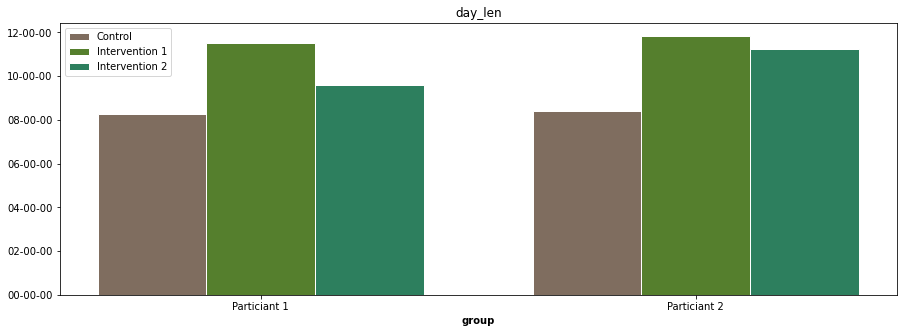

In [11]:
headers = ["work_len",'work_count', 'max_work_len', 'average_work_len', 'min_work_len', 'med_count', 'break_len', 'break_count', 'min_break_len', 'average_break_len', 'max_break_len', 'day_len']
for head in headers:
    plotBar(values1,values2,head)
    

In [12]:
def outside95(act):
    before9 = act.between_time('00:00', '09:00')  
    between = act.between_time('09:00', '17:00')  
    after5 = act.between_time('17:00', '00:00')
    outside = act.between_time('17:00', '09:00')
    
    #before9 
    extra1 = datetime.timedelta(seconds=0) 
    if len(before9)> 0:
        #print(before9)
        if before9["Activity"][-1] == "Work":
            #print(before9["Activity"][0].index)
            before_time = before9["end_time"][-1].round('1s')
            NineAM = before_time.replace(hour=9, minute = 0, second = 0)
            extra1 = before_time - NineAM
    #print("Before: ",extra1)
    
    extra2 = datetime.timedelta(seconds=0) 
    if len(between)> 0:
        #print(between)
        if between["Activity"][-1] == "Work":  # used end_time instead of index
            #print(between["end_time"][-1].round('1s'))
            after_time = between["end_time"][-1].round('1s')
            FivePM = after_time.round('1s').replace(hour=17, minute = 0, second = 0)
            temp = after_time-FivePM
            if temp > extra2:
                extra2 = temp
            
    #print("After: ",extra2)   
    
    work_only = outside.loc[act['Activity'] == "Work"]
    total = work_only["duration"].sum().round('1s')
    total = total + extra2 - extra1
    #print("Outside: ", total)
    #print(work_only)
        
    return total
    
hours_out = []

for day in dates1:
    hours_out.append(outside95(act_df1.loc[day]))
    
print(hours_out)

values1["hours_out"] = hours_out
values1["hours_out p"] =  round(100*values1["hours_out"]/values1["work_len"],2)
values1["hours_in"] = values1["work_len"] - values1["hours_out"]
values1["hours_in p"] =  round(100*values1["hours_in"]/values1["work_len"],2)
print(values1["hours_out p"],values1["hours_in p"])


hours_out = []
for day in dates2:
    hours_out.append(outside95(act_df2.loc[day]))

print(hours_out)

values2["hours_out"] = hours_out
values2["hours_out p"] =  round(100*values2["hours_out"]/values2["work_len"],2)
values2["hours_in"] = values2["work_len"] - values2["hours_out"]
values2["hours_in p"] =  round(100*values2["hours_in"]/values2["work_len"],2)
print(values2["hours_out p"],values2["hours_in p"])

[Timedelta('0 days 01:31:05'), Timedelta('0 days 02:59:25'), Timedelta('0 days 00:54:51'), Timedelta('0 days 01:34:54'), Timedelta('0 days 00:21:48'), Timedelta('0 days 00:36:35'), Timedelta('0 days 00:08:55'), Timedelta('0 days 00:43:58'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:19:58')]
dates
2021-04-26    18.61
2021-04-27    34.08
2021-04-28    13.03
2021-04-29    22.73
2021-04-30     4.78
2021-05-04     9.33
2021-05-05     2.95
2021-05-06     9.63
2021-05-07     0.00
2021-05-10     4.56
Name: hours_out p, dtype: float64 dates
2021-04-26     81.39
2021-04-27     65.92
2021-04-28     86.97
2021-04-29     77.27
2021-04-30     95.22
2021-05-04     90.67
2021-05-05     97.05
2021-05-06     90.37
2021-05-07    100.00
2021-05-10     95.44
Name: hours_in p, dtype: float64
[Timedelta('0 days 01:21:00'), Timedelta('0 days 02:05:29'), Timedelta('0 days 02:05:16'), Timedelta('0 days 02:29:48'), Timedelta('0 days 01:19:28'), Timedelta('0 days 02:46:28'), Timedelta('0 days 01:29:52'),

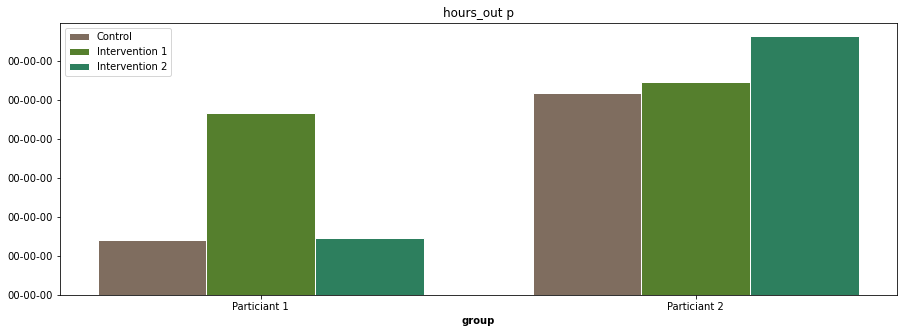

In [13]:

plotBar(values1,values2,"hours_out p")

In [14]:
values1.to_csv (r'values1.csv', index = True, header=True)
values2.to_csv (r'values2.csv', index = True, header=True)

In [15]:
# P1

lengthnoeve1 = ["09:22:04","08:01:23","09:26:14","07:11:40","08:21:49","08:57:15","07:23:24","08:45:05","07:07:23","08:09:59"]
evework1 = [0,1,0,1,0,0,1,0,0,0]

# P2

lengthnoeve2 =["06:58:10","10:21:49","09:15:26","10:17:38","09:16:57","11:06:30","09:30:58","04:38:21","09:08:20","04:40:05"] 
evework2 = [0,0,1,1,0,1,0,1,1,0]

noeve1 = []
for x in lengthnoeve1:
    sec = int(x[:2])*60*60+int(x[3:5])*60+int(x[6:])
    noeve1.append(datetime.timedelta(seconds = sec))

noeve2 = []
for x in lengthnoeve2:
    sec = int(x[:2])*60*60+int(x[3:5])*60+int(x[6:])
    noeve2.append(datetime.timedelta(seconds = sec))
    
values1["noevelen"] = noeve1
values2["noevelen"] = noeve2
values1["evework"] = evework1
values2["evework"] = evework2

In [16]:
hour1 = datetime.timedelta(hours=1)
hourplus1 = []
for day in dates1:
    print (day)
    temp = act_df1.loc[day]
    temp = temp.loc[temp["Activity"] == "Work"]
    hourplus1.append(len(temp.loc[temp["duration"] > hour1]))
    
print(hourplus1)

hourplus2 = []
for day in dates2:
    print (day)
    temp = act_df2.loc[day]
    temp = temp.loc[temp["Activity"] == "Work"]
    hourplus2.append(len(temp.loc[temp["duration"] > hour1]))
    
print(hourplus2)

values1["hourplus"] = hourplus1
values2["hourplus"] = hourplus2

2021-04-26
2021-04-27
2021-04-28
2021-04-29
2021-04-30
2021-05-04
2021-05-05
2021-05-06
2021-05-07
2021-05-10
[4, 3, 3, 2, 2, 3, 2, 4, 3, 3]
2021-04-26
2021-04-27
2021-04-28
2021-04-29
2021-04-30
2021-05-10
2021-05-11
2021-05-12
2021-05-13
2021-05-14
[3, 4, 2, 4, 4, 3, 3, 1, 1, 1]


In [17]:
v1c = values1.loc[values1['control'] == 0]
v11 = values1.loc[values1['control'] == 1]
v12 = values1.loc[values1['control'] == 2]

v2c = values2.loc[values2['control'] == 0]
v21 = values2.loc[values2['control'] == 1]
v22 = values2.loc[values2['control'] == 2]


In [18]:
import scipy.stats
import math

def ttester(control,int1,int2,cat):
    try:
        output1 = scipy.stats.ttest_ind(control,int1, equal_var=False)
        output2 = scipy.stats.ttest_ind(control,int2, equal_var=False)
    except:
        control = control/ np.timedelta64(1, 's')
        int1 = int1/ np.timedelta64(1, 's')
        int2 = int2/ np.timedelta64(1, 's')
        output1 = scipy.stats.ttest_ind(control,int1, equal_var=False)
        output2 = scipy.stats.ttest_ind(control,int2, equal_var=False)
        
    meanc = round(control.mean(),4)
    mean1 = round(int1.mean(),4)
    mean2 = round(int2.mean(),4)
    
    sdc = round(control.std(),4)
    sd1 = round(int1.std(),4)
    sd2 = round(int2.std(),4)
    
    sec = round(sdc/math.sqrt(len(control)),4)
    se1 = round(sd1/math.sqrt(len(int1)),4)
    se2 = round(sd2/math.sqrt(len(int2)),4)
    
    sig1, sig2 = 0,0
    if output1[1] < 0.05:
        sig1 = 1
    if output2[1] < 0.05:
        sig2 = 1
    if ("len" in cat or "leaning" in cat or "hours" in cat) and not "p" in cat:
        meanc = datetime.timedelta(seconds=round(meanc))
        mean1 = datetime.timedelta(seconds=round(mean1))
        mean2 = datetime.timedelta(seconds=round(mean2))
        sdc = datetime.timedelta(seconds=round(sdc))
        sd1 = datetime.timedelta(seconds=round(sd1))
        sd2 = datetime.timedelta(seconds=round(sd2))
        sec = datetime.timedelta(seconds=round(sec))
        se1 = datetime.timedelta(seconds=round(se1))
        se2 = datetime.timedelta(seconds=round(se2))
        
        
    rows = [[cat, 0, 1, meanc, sdc, sec, mean1, sd1, se1, output1[0], output1[1], sig1],
            [cat, 0, 2, meanc, sdc, sec, mean2, sd2, se2, output2[0], output2[1], sig2]]
        
    return rows


catagory = "work_len"
out = ttester(v1c[catagory],v11[catagory],v12[catagory],catagory)


In [19]:
header = ["Catagory","Control", "Intervention", "Mean-C","SD-C", "SE-C","Mean-I", "SD-I","SE-I", "T-Value", "P-Value","Significant"]
table = []
for x in list(values1)[2:]:
    #print(x)
    row = ttester(v1c[x],v11[x],v12[x],x)
    table.append(row[0])
    table.append(row[1])

ttest_results1 = pd.DataFrame(data=table, columns = header)
print(ttest_results1)

table = []
for x in list(values1)[2:]:
    #print(x)
    row = ttester(v2c[x],v21[x],v22[x],x)
    table.append(row[0])
    table.append(row[1])

ttest_results2 = pd.DataFrame(data=table, columns = header)

             Catagory  Control  Intervention   Mean-C     SD-C     SE-C  \
0            work_len        0             1  7:20:36  0:46:09  0:23:04   
1            work_len        0             2  7:20:36  0:46:09  0:23:04   
2          work_count        0             1     9.25   2.0616   1.0308   
3          work_count        0             2     9.25   2.0616   1.0308   
4        max_work_len        0             1  1:34:15  0:16:12  0:08:06   
5        max_work_len        0             2  1:34:15  0:16:12  0:08:06   
6    average_work_len        0             1  0:48:43  0:06:46  0:03:23   
7    average_work_len        0             2  0:48:43  0:06:46  0:03:23   
8        min_work_len        0             1  0:11:20  0:05:57  0:02:59   
9        min_work_len        0             2  0:11:20  0:05:57  0:02:59   
10          med_count        0             1      0.0      0.0      0.0   
11          med_count        0             2      0.0      0.0      0.0   
12          break_len    

In [20]:
ttest_results1.to_csv (r'ttest_results1.csv', index = True, header=True)
ttest_results2.to_csv (r'ttest_results2.csv', index = True, header=True)

In [21]:

def ttester12(control,int1,int2,cat):
    try:
        output1 = scipy.stats.ttest_ind(int1,int2, equal_var=False)
    except:
        control = control/ np.timedelta64(1, 's')
        int1 = int1/ np.timedelta64(1, 's')
        int2 = int2/ np.timedelta64(1, 's')
        output1 = scipy.stats.ttest_ind(int1,int2, equal_var=False)
        
    meanc = round(control.mean(),4)
    mean1 = round(int1.mean(),4)
    mean2 = round(int2.mean(),4)
    
    sdc = round(control.std(),4)
    sd1 = round(int1.std(),4)
    sd2 = round(int2.std(),4)
    
    sec = round(sdc/math.sqrt(len(control)),4)
    se1 = round(sd1/math.sqrt(len(int1)),4)
    se2 = round(sd2/math.sqrt(len(int2)),4)
    
    sig1, sig2 = 0,0
    if output1[1] < 0.05:
        sig1 = 1

    if ("len" in cat or "leaning" in cat or "hours" in cat) and not "p" in cat:
        meanc = datetime.timedelta(seconds=round(meanc))
        mean1 = datetime.timedelta(seconds=round(mean1))
        mean2 = datetime.timedelta(seconds=round(mean2))
        sdc = datetime.timedelta(seconds=round(sdc))
        sd1 = datetime.timedelta(seconds=round(sd1))
        sd2 = datetime.timedelta(seconds=round(sd2))
        sec = datetime.timedelta(seconds=round(sec))
        se1 = datetime.timedelta(seconds=round(se1))
        se2 = datetime.timedelta(seconds=round(se2))
        
        
    rows = [cat, 1, 2, mean1, sd1, se1, mean2, sd2, se2, output1[0], output1[1], sig1]
        
    return rows

In [22]:
table = []
for x in list(values1)[2:]:
    #print(x)
    row = ttester12(v1c[x],v11[x],v12[x],x)
    table.append(row)

ttest_results112 = pd.DataFrame(data=table, columns = header)
print (ttest_results112)

table = []
for x in list(values2)[2:]:
    #print(x)
    row = ttester12(v2c[x],v21[x],v22[x],x)
    table.append(row)

ttest_results212 = pd.DataFrame(data=table, columns = header)
print (ttest_results212)

ttest_results112.to_csv (r'ttest_results112.csv', index = True, header=True)
ttest_results212.to_csv (r'ttest_results212.csv', index = True, header=True)

             Catagory  Control  Intervention    Mean-C     SD-C     SE-C  \
0            work_len        1             2   7:35:00  1:01:54  0:35:44   
1          work_count        1             2      11.0      1.0   0.5774   
2        max_work_len        1             2   1:54:26  0:35:28  0:20:29   
3    average_work_len        1             2   0:41:34  0:06:24  0:03:41   
4        min_work_len        1             2   0:01:57  0:01:36  0:00:56   
5           med_count        1             2      11.0      1.0   0.5774   
6           break_len        1             2   3:43:52  1:20:01  0:46:12   
7         break_count        1             2      10.0      1.0   0.5774   
8       min_break_len        1             2   0:00:48  0:00:20  0:00:11   
9   average_break_len        1             2   0:23:00  0:09:44  0:05:37   
10      max_break_len        1             2   1:57:52  0:36:20  0:20:59   
11            day_len        1             2  11:31:06  2:00:11  1:09:23   
12       lea

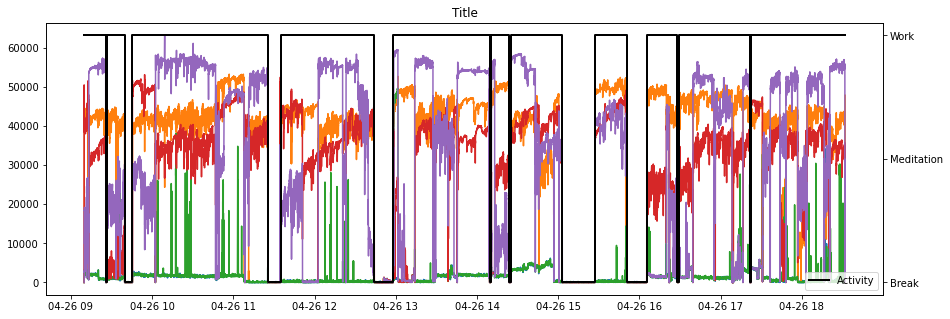

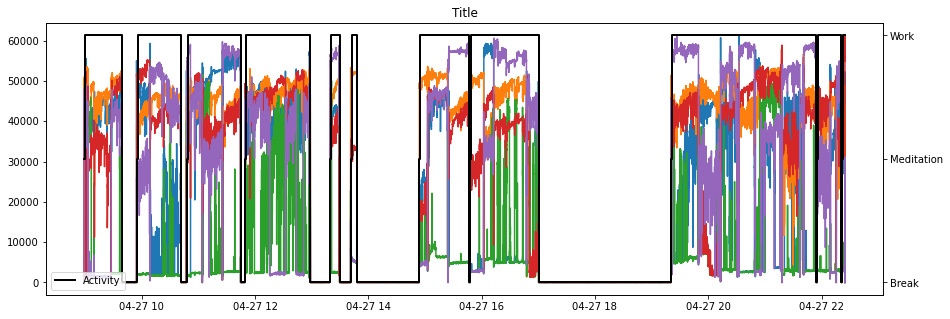

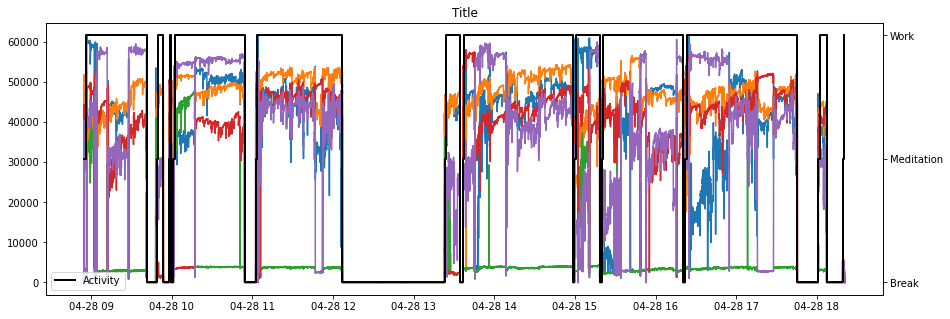

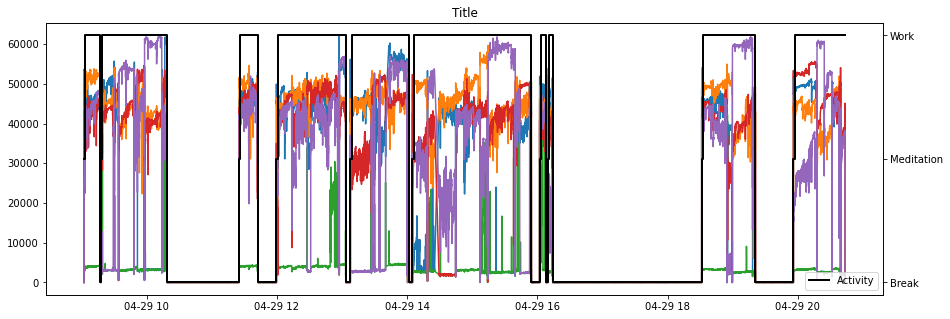

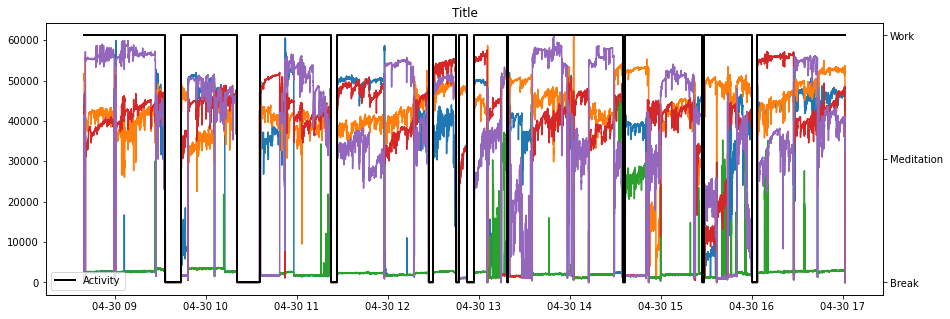

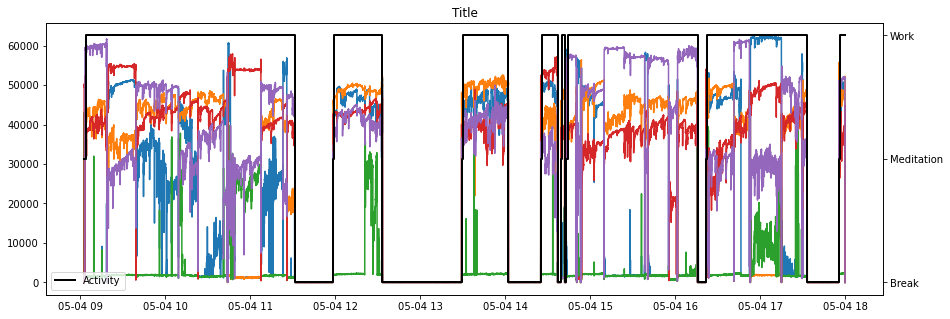

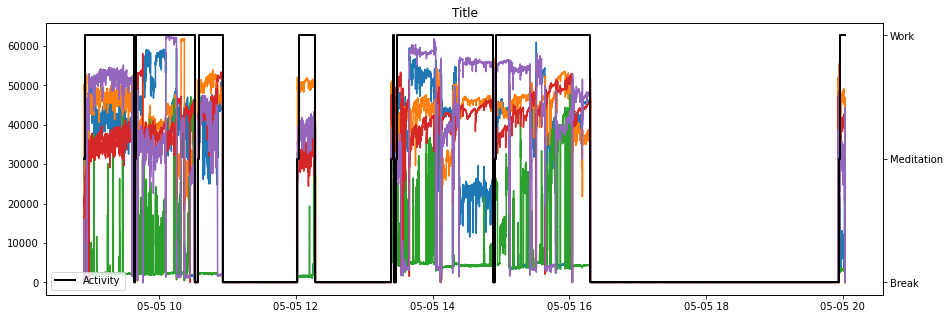

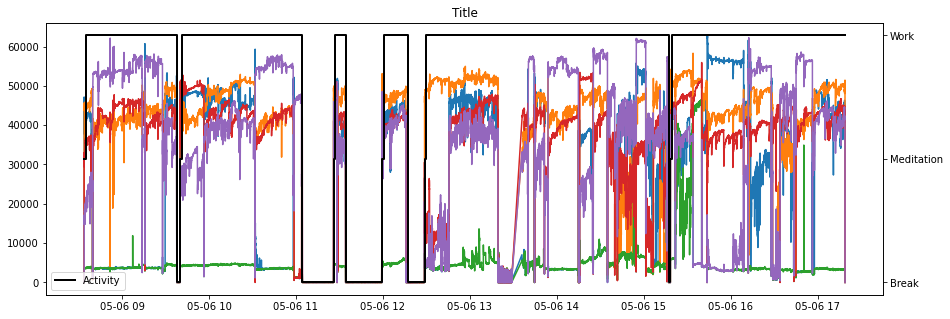

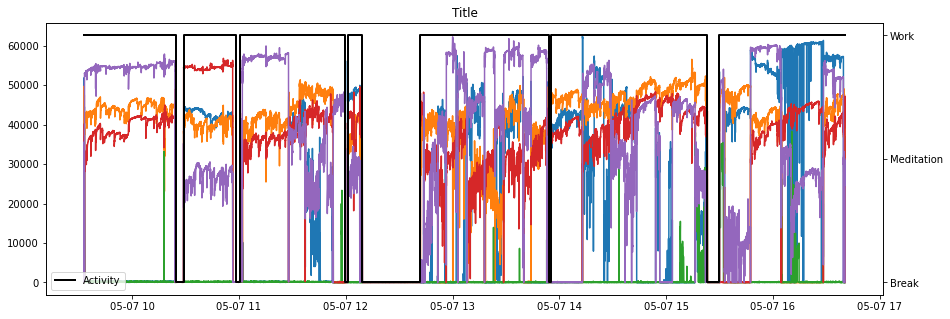

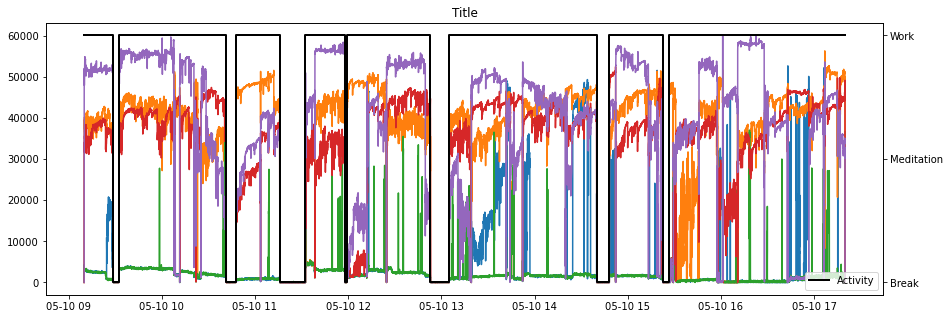

In [25]:

for day in dates1:
    plotBoth(data_df1.loc[day],act_df1.loc[day])